# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import VarianceRatio
import matplotlib as mpl
import statsmodels.tsa.stattools as ts
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.arima_model import ARIMA


### Question 1

In [2]:
wind_data = pd.read_csv("WindGeneration.csv")
wind_data.head()

,Date,Time,Wind Generation
0,01/01/2014,1,1190.1
1,01/01/2014,2,1186.6
2,01/01/2014,3,1174.3
3,01/01/2014,4,1146.7
4,01/01/2014,5,1156.8


In [3]:
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Time             8760 non-null   int64  
 2   Wind Generation  8759 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


In [4]:
wind_data.interpolate(inplace = True)

In [5]:
wind_data.Date = pd.to_datetime(wind_data.Date, dayfirst = True)

In [6]:
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Time             8760 non-null   int64         
 2   Wind Generation  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 205.4 KB


In [7]:
wind_data.columns = ["date", "time", "wind_generation"]

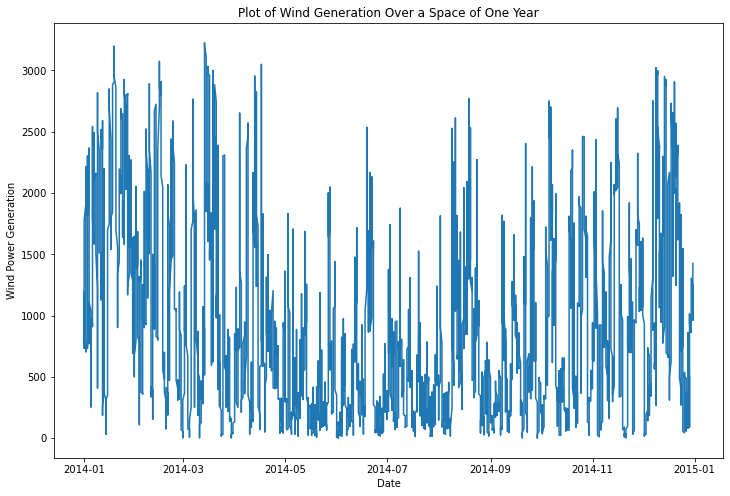

In [8]:
#Plotting the wind generation over time to see if seasonality is apparent
plt.figure(figsize = (12, 8))
plt.plot(wind_data["date"],wind_data["wind_generation"])
plt.xlabel("Date")
plt.ylabel("Wind Power Generation")
plt.title("Plot of Wind Generation Over a Space of One Year")
plt.show()

Observation: No apparent seasonality seems to be observed

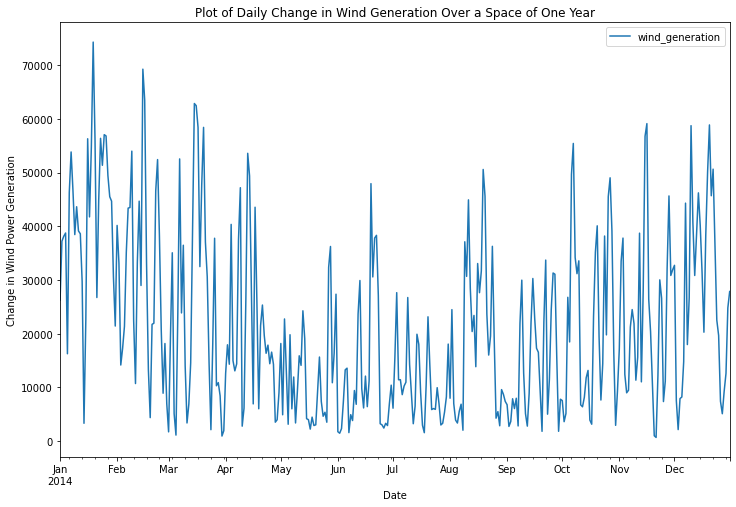

In [9]:
daily = wind_data[["date","wind_generation"]].set_index('date').resample('D').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Daily Change in Wind Generation Over a Space of One Year")
plt.show()

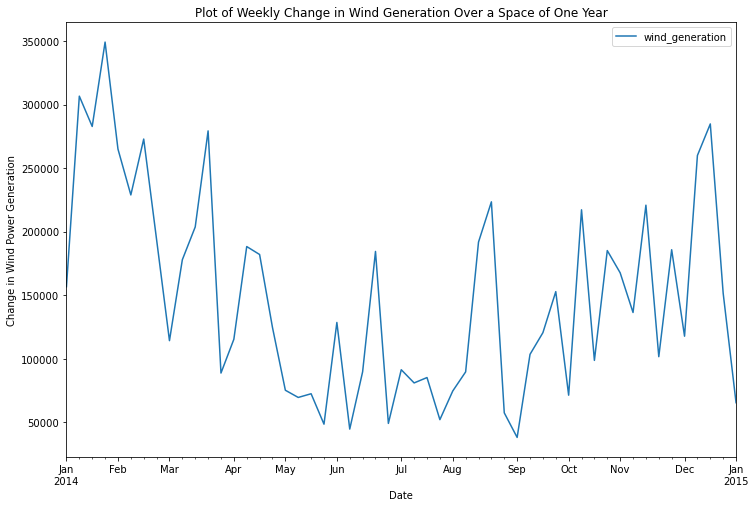

In [10]:
daily = wind_data[["date","wind_generation"]].set_index('date').resample('W').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Weekly Change in Wind Generation Over a Space of One Year")
plt.show()

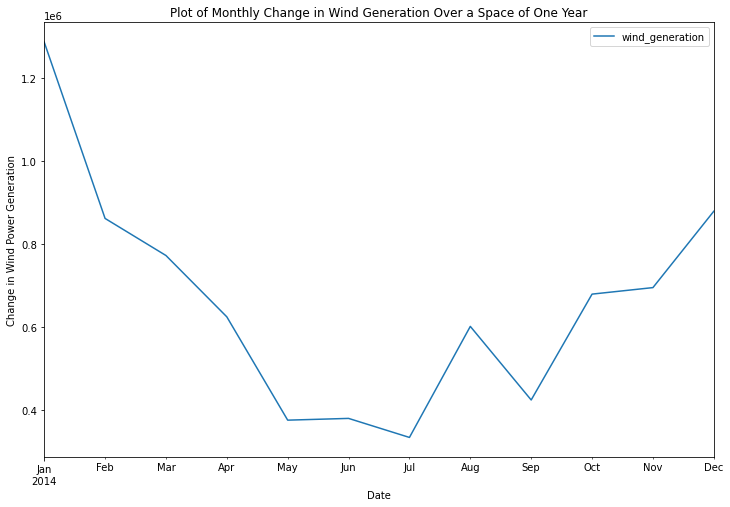

In [11]:
daily = wind_data[["date","wind_generation"]].set_index('date').resample('M').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Monthly Change in Wind Generation Over a Space of One Year")
plt.show()

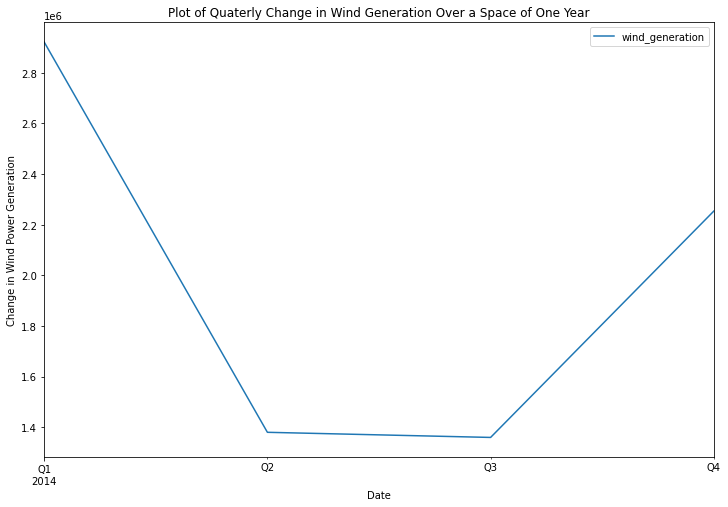

In [12]:
daily = wind_data[["date","wind_generation"]].set_index('date').resample('Q').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Quaterly Change in Wind Generation Over a Space of One Year")
plt.show()

### Question 2

In [13]:
max_gen = max(wind_data.wind_generation)

In [14]:
wind_data["percent_change"] = ((wind_data["wind_generation"]-wind_data["wind_generation"].shift(1))/max_gen)*100

In [15]:
wind_data.head()

,date,time,wind_generation,percent_change
0,2014-01-01,1,1190.1,NaN
1,2014-01-01,2,1186.6,-0.108514
2,2014-01-01,3,1174.3,-0.381348
3,2014-01-01,4,1146.7,-0.855708
4,2014-01-01,5,1156.8,0.313139


In [16]:
max_gen

3225.4

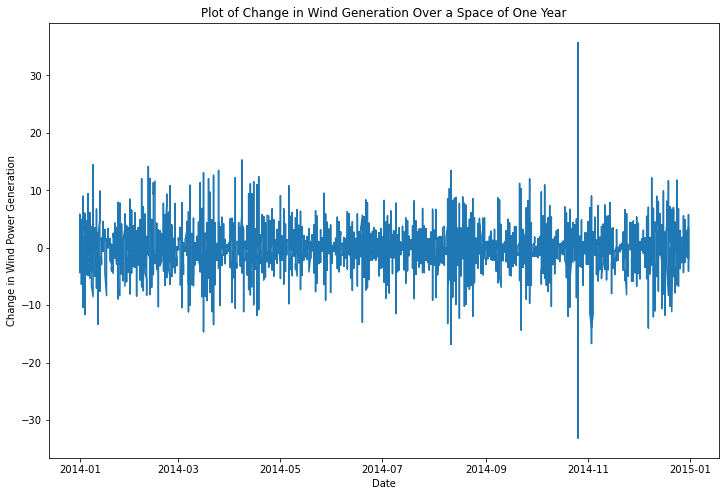

In [17]:
#Plotting the change in wind generation over time to see if seasonality is apparent
plt.figure(figsize = (12, 8))
plt.plot(wind_data["date"],wind_data["percent_change"])
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Change in Wind Generation Over a Space of One Year")
plt.show()

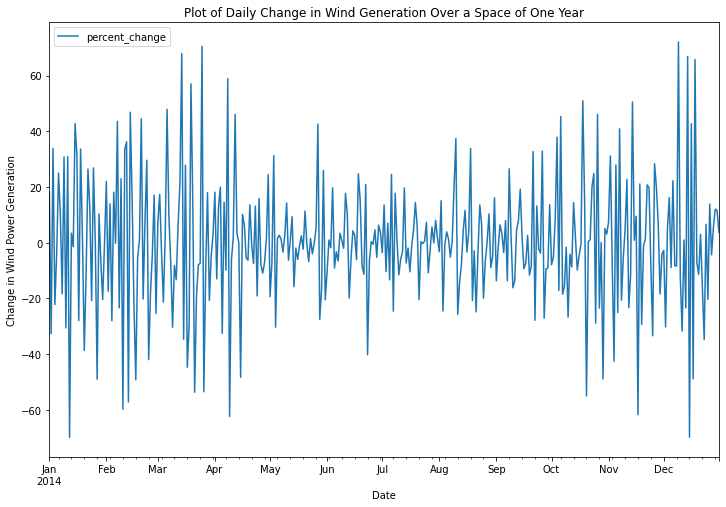

In [18]:
daily = wind_data[["date","percent_change"]].set_index('date').resample('D').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Daily Change in Wind Generation Over a Space of One Year")
plt.show()

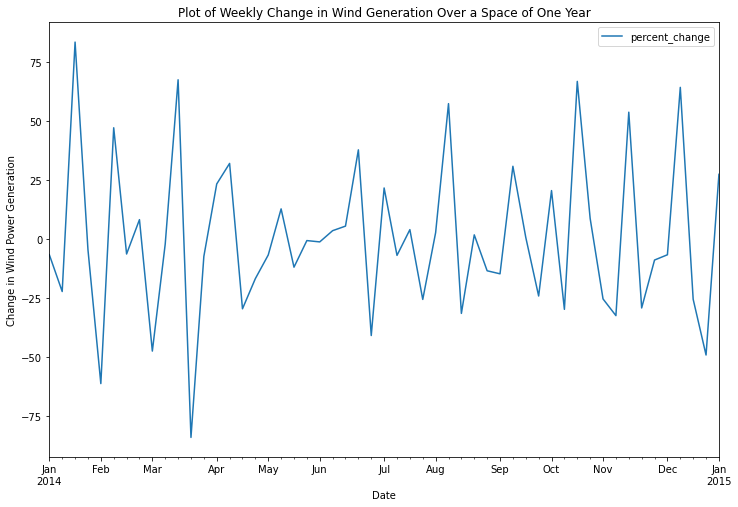

In [19]:
daily = wind_data[["date","percent_change"]].set_index('date').resample('W').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Weekly Change in Wind Generation Over a Space of One Year")
plt.show()

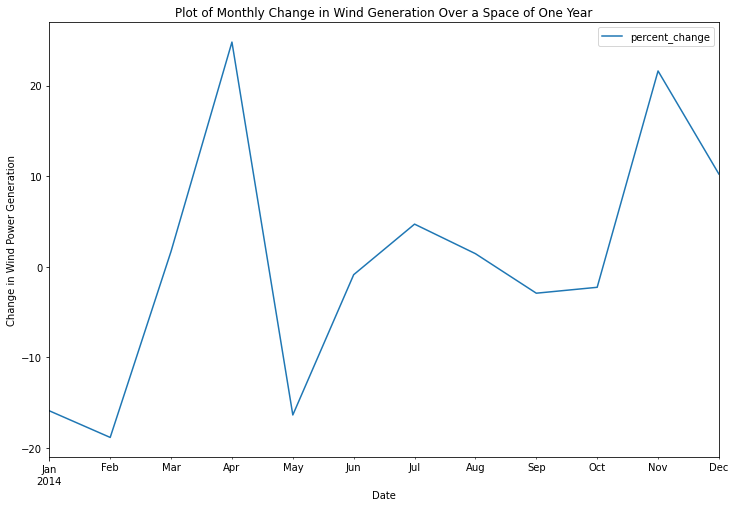

In [20]:
daily = wind_data[["date","percent_change"]].set_index('date').resample('M').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Monthly Change in Wind Generation Over a Space of One Year")
plt.show()

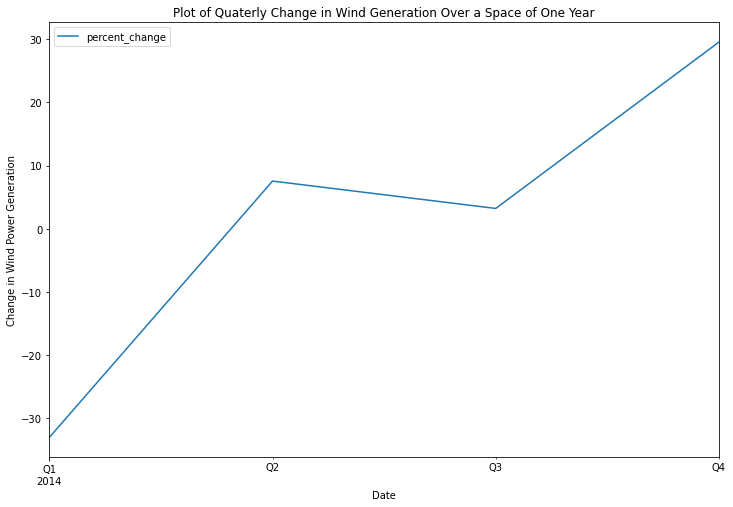

In [21]:
daily = wind_data[["date","percent_change"]].set_index('date').resample('Q').sum()
daily.plot(figsize = (12, 8))
plt.xlabel("Date")
plt.ylabel("Change in Wind Power Generation")
plt.title("Plot of Quaterly Change in Wind Generation Over a Space of One Year")
plt.show()

Observation: Seasonality observed in the trend

### Question 3

In [22]:
neg_ramp = []
pos_ramp = []

for i in (wind_data["percent_change"].dropna()):
    if (i < 0):
        neg_ramp.append(i)
    else:
        pos_ramp.append(i)
        
neg_ramp = np.sort(np.abs(neg_ramp))
neg_ramp = -1 * neg_ramp 
pos_ramp = np.sort(pos_ramp)

In [23]:
x_norm = np.random.normal(0, np.std(wind_data["percent_change"]), 1000000)

x_pos = x_norm[x_norm >= 0]
x_neg = x_norm[x_norm < 0]

x_neg = np.sort(np.abs(x_neg))
x_neg = -1 * x_neg
x_pos = np.sort(x_pos)

x_pos_cdf = x_pos.cumsum()/sum(x_pos)
x_neg_cdf = x_neg.cumsum()/sum(x_neg)

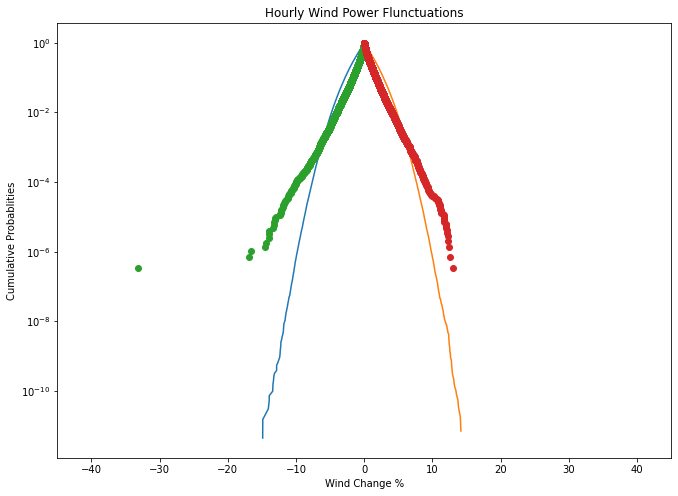

In [24]:
prob_pos_ramp = pos_ramp.cumsum()/sum(pos_ramp)
prob_neg_ramp = neg_ramp.cumsum()/sum(neg_ramp)

plt.figure(figsize=(11,8))
plt.semilogy(x_neg, np.flipud(x_neg_cdf))
plt.semilogy(x_pos, np.flipud(x_pos_cdf))
plt.semilogy(neg_ramp, np.flipud(prob_neg_ramp), 'o', linestyle = "None")
plt.semilogy(pos_ramp, np.flipud(prob_pos_ramp), 'o', linestyle = "None")
plt.xlim(-45, 45)
plt.title("Hourly Wind Power Flunctuations")
plt.xlabel("Wind Change %")
plt.ylabel("Cumulative Probablities")
plt.show()

### Question 4

In [25]:
for i in range(1, 25):
    wind_data[str(i) + "_hr"] = ((wind_data["wind_generation"]-wind_data["wind_generation"].shift(i))/max_gen)*100

In [26]:
hourly_ramps = wind_data.drop(columns = ["date", "time", "wind_generation", "percent_change"])
hourly_ramps.head()

,1_hr,2_hr,3_hr,4_hr,5_hr,6_hr,7_hr,8_hr,9_hr,10_hr,...,15_hr,16_hr,17_hr,18_hr,19_hr,20_hr,21_hr,22_hr,23_hr,24_hr
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.108514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.381348,-0.489862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.855708,-1.237056,-1.345570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.313139,-0.542568,-0.923916,-1.03243,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
quantile_1 = hourly_ramps.quantile(0.001)
quantile_2 = hourly_ramps.quantile(0.005)
quantile_3 = hourly_ramps.quantile(0.95)
quantile_4 = hourly_ramps.quantile(0.99)

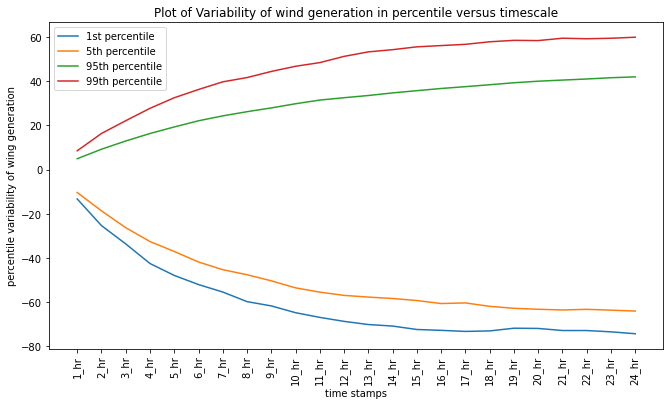

In [28]:
plt.figure(figsize=(11, 6))
plt.plot(quantile_1, label = "1st percentile")
plt.plot(quantile_2, label = "5th percentile")
plt.plot(quantile_3, label = "95th percentile")
plt.plot(quantile_4, label = "99th percentile")
plt.xticks(rotation = 90)
plt.xlabel("time stamps")
plt.ylabel("percentile variability of wing generation")
plt.legend()
plt.title("Plot of Variability of wind generation in percentile versus timescale")
plt.show()

### Question 5

In [29]:
wind_data.head()

,date,time,wind_generation,percent_change,1_hr,2_hr,3_hr,4_hr,5_hr,6_hr,...,15_hr,16_hr,17_hr,18_hr,19_hr,20_hr,21_hr,22_hr,23_hr,24_hr
0,2014-01-01,1,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,2,1186.6,-0.108514,-0.108514,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,3,1174.3,-0.381348,-0.381348,-0.489862,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,4,1146.7,-0.855708,-0.855708,-1.237056,-1.345570,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-01,5,1156.8,0.313139,0.313139,-0.542568,-0.923916,-1.03243,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


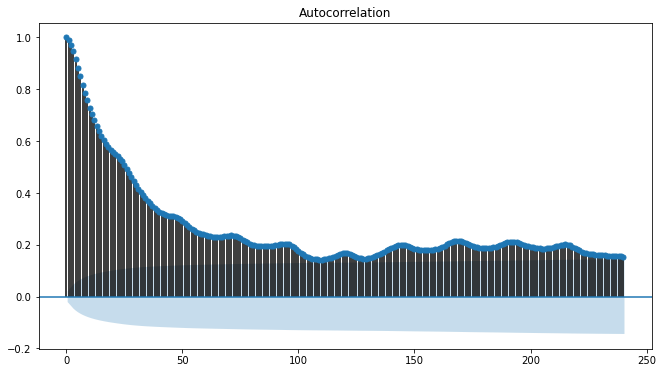

In [30]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(11,6))
    plot_acf(wind_data["wind_generation"], lags=240)
    plt.show()

### Question 6

In [31]:
hourly_ramps["1_hr"].dropna().head()

1   -0.108514
2   -0.381348
3   -0.855708
4    0.313139
5    1.020029
Name: 1_hr, dtype: float64

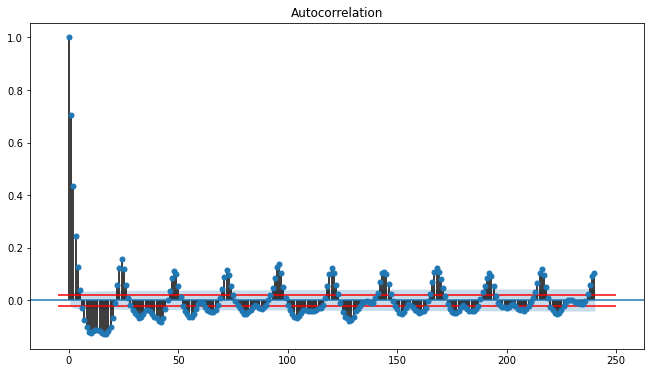

In [32]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(11,6))
    plot_acf(hourly_ramps["1_hr"].dropna(), lags=240)
    plt.hlines(1.96/np.sqrt(len(hourly_ramps["1_hr"].dropna(),)), -5, 250, color='r')
    plt.hlines(-1.96/np.sqrt(len(hourly_ramps["1_hr"].dropna(),)), -5, 250, color='r')
    plt.show()

### Question 7

In [33]:
returns = wind_data["wind_generation"]
vr = VarianceRatio(returns, lags=240)
print(vr.summary().as_text())

     Variance-Ratio Test Results     
Test Statistic                 -2.558
P-value                         0.011
Lags                              240
-------------------------------------

Computed with overlapping blocks (de-biased)


In [34]:
cadf = ts.adfuller(returns)
print('Augmented Dickey Fuller test statistic =',cadf[0])
print('Augmented Dickey Fuller p-value =',cadf[1])
print('Augmented Dickey Fuller 1%, 5% and 10% test statistics =',cadf[4])

Augmented Dickey Fuller test statistic = -9.507227276824725
Augmented Dickey Fuller p-value = 3.322198217670321e-16
Augmented Dickey Fuller 1%, 5% and 10% test statistics = {'1%': -3.4310990236088363, '5%': -2.8618710185907106, '10%': -2.566946196227356}


### Question 8

In [35]:
new_wind_data = wind_data[["wind_generation"]]
n = [x for x in range(1, 25)]
MAE = []
for i in n:
    new_wind_data['MA_' +str(i)] = new_wind_data.wind_generation.rolling(i).mean()
    
new_wind_data.dropna(inplace = True)

for i in new_wind_data.drop(columns = ["wind_generation"]).columns:
    MAE.append(mae(new_wind_data["wind_generation"], new_wind_data[i]))

<ipython-input-35-0ec622c2a4ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_wind_data['MA_' +str(i)] = new_wind_data.wind_generation.rolling(i).mean()
<ipython-input-35-0ec622c2a4ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_wind_data.dropna(inplace = True)


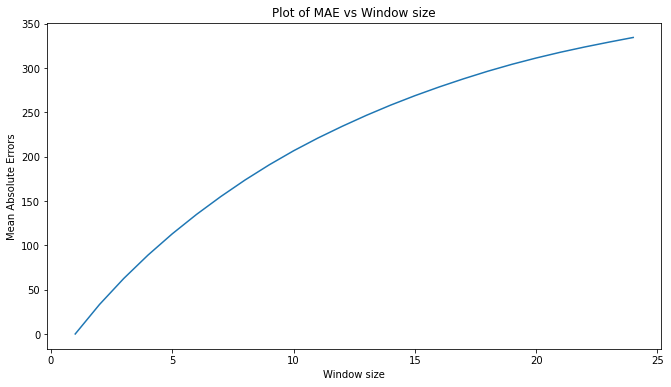

In [36]:
plt.figure(figsize = (11, 6))
plt.plot(n, MAE)
plt.xlabel("Window size")
plt.ylabel("Mean Absolute Errors")
plt.title("Plot of MAE vs Window size")
plt.show()

### Question 9

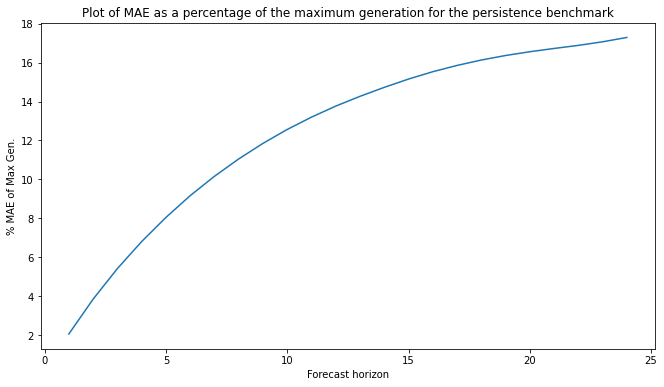

In [37]:
mae_values = []
df = pd.DataFrame()
max_val = wind_data[["wind_generation"]].max()
for i in range(1, 25):
    df["y_actual"] = wind_data["wind_generation"]
    df["y_pred"] = wind_data["wind_generation"].shift(i)
    df.dropna(inplace = True)
    mae_values.append(mae(df["y_actual"], df["y_pred"]))
plt.figure(figsize = (11, 6))
plt.ylabel("% MAE of Max Gen.")
plt.xlabel("Forecast horizon")
plt.title("Plot of MAE as a percentage of the maximum generation for the persistence benchmark")
plt.plot([x for x in range(1, 25)], (mae_values/max_val[0])*100)
plt.show()

### Question 10

In [38]:
dic_aic = {}
dic_bic ={}
for i in range(1, 5):
    for j in range(1, 5):
        model = ARIMA(wind_data['wind_generation'], order=(i,1,j))
        model_fit = model.fit()
        print("p, q = ", i, j)
        print("AIC = ",model_fit.aic)
        dic_aic[str(i) + "_" + str(j)] = model_fit.aic
        print("BIC = ",model_fit.bic)
        dic_bic[str(i) + "_" + str(j)] = model_fit.bic

p, q =  1 1
AIC =  98979.61517250224
BIC =  99007.92652059089
p, q =  1 2
AIC =  98966.01291328332
BIC =  99001.40209839414
p, q =  1 3
AIC =  98967.70461813628
BIC =  99010.17164026925
p, q =  1 4
AIC =  98967.26843675226
BIC =  99016.8132959074
p, q =  2 1
AIC =  98855.04467369139
BIC =  98890.43385880221
p, q =  2 2
AIC =  98785.836337642
BIC =  98828.30335977497
p, q =  2 3
AIC =  98784.35927356906
BIC =  98833.9041327242
p, q =  2 4
AIC =  98784.87158469649
BIC =  98841.4942808738
p, q =  3 1
AIC =  98783.38922566951
BIC =  98825.85624780248
p, q =  3 2
AIC =  98785.23069604315
BIC =  98834.77555519828
p, q =  3 3
AIC =  98785.29545290073
BIC =  98841.91814907803
p, q =  3 4
AIC =  98788.05260469514
BIC =  98851.75313789462
p, q =  4 1
AIC =  98785.18769076429
BIC =  98834.73254991943
p, q =  4 2
AIC =  98786.319408273
BIC =  98842.94210445031
p, q =  4 3
AIC =  98785.65715550816
BIC =  98849.35768870763
p, q =  4 4
AIC =  98776.47210725442
BIC =  98847.25047747605


In [39]:
def minimums(some_dict):
    positions = [] # output variable
    min_value = float("inf")
    for k, v in some_dict.items():
        if v == min_value:
            positions.append(k)
        if v < min_value:
            min_value = v
            positions = [] # output variable
            positions.append(k)

    return positions

In [40]:
minimums(dic_aic)

['4_4']

In [41]:
minimums(dic_bic)

['3_1']

In [42]:
dic_aic_bic_sum = {}
for i in range(1, 5):
    for j in range(1, 5):
        model = ARIMA(wind_data['wind_generation'], order=(i,1,j))
        model_fit = model.fit()
        dic_aic_bic_sum[str(i) + "_" + str(j)] = model_fit.aic + model_fit.bic
minimums(dic_aic_bic_sum)

['3_1']

Hence the optimal ARIMA model that mininizes both BIC and AIC has p = 3, and q = 1